## A first (actually second) encounter with Keras

`Keras` is a high-level Python library for **deep learning**: Keras is an API wrapper for `TensorFlow`, which is the **backend engine** that performs low-level computations (e.g. tensor products, convolutions, etc.).

[Don't worry if there are many terms that you don't fully understand now: we will go over these concepts repeatedly during the course, with increasing levels of detail]

Keras allows easy and fast deployment of neural networks models: the code chunk below imports `Keras` functions that define a specific neural network architecture:

- `Sequential()`: a network made up of a sequence of successive layers
- `Dense()`: fully-connected (dense) layers
- the type of **activation functions** to be used in each layer
- the number of units in each layer


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Conv2D,MaxPooling2D,Flatten,Dropout

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=50)) #input shape of 50
model.add(Dense(28, activation='relu')) #input shape of 50
model.add(Dense(10, activation='softmax'))

## Model definition

As we saw above, the first step is to choose the neural network architecture and define the deep learning model.

We first use the `Sequential()` function to select the Keras API for the construction of deep learning models. Sequential models are a stack of layers, each with one input and one output tensor.

The function `add()` will then allow us to add subsequent layers to our deep learning model, by specifying the type of layer

In [ ]:
model = Sequential()

### Dense layer

The first very common type of layer is the **Fully Connected** (dense) layer: we can specify the number of units in the layer and the activation function to use.

In [ ]:
##input shape: tensor size e.g. 12 x 12 pixels x 3 channels (RGB)
model.add(Dense(units = 32, activation='relu', input_shape=(12,12,3))) 

### Convolutional layer

Another common type of layers is the **convolutional layer** where we specify the number of filters, the size of the filter (kernel) and the activation function.


In [ ]:
model.add(Conv2D(filters = 8, kernel_size = (3, 3), activation='relu'))

### MaxPooling layer

MaxPooling layers downsample the input representation by taking the maximum value over the window defined by pool size for each dimension along the features axis ($\rightarrow$ dimensionality reduction)


In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

### Dropout layer

The **dropout layer** randomly sets input units to 0 with a specified frequency (`rate` argument) at each step during training, which helps prevent overfitting. 

In [ ]:
model.add(Dropout(rate = 0.5))

We can get an overview of the defined deep learning model by using the `model.summary()` function:

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12, 12, 32)        128       
_________________________________________________________________
conv2d (Conv2D)              (None, 10, 10, 8)         2312      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 5, 8)           0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 8)           0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 8)           0         
Total params: 2,440
Trainable params: 2,440
Non-trainable params: 0
_________________________________________________________________
None


We see that we have a large number of parameters to train in this model: 

- 4 parameters (3 channels + bias term) per 32 units in the Dense layer $\rightarrow$ 128 parameters
- for convolutional layer number of parameter is computed as:
    - number_parameters = out_channels * (in_channels * kernel_h * kernel_w + 1)
    - the "+ 1" is for bias term
    - `out_channels` = number of units in current layers = 8
    - `in_channels` = number of units in previous layer = 32
    - `kernel_h` = `kernel_w` = 3
    - 8 * (32 * 3 * 3 + 1) = 2312


## Compiling the model

Once the model architecture has been defined, you go on compiling the model by setting up relevant configurations: **loss function**, **optimizer**, etc. 

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

The next steps would be to:

- fit the built and compiled model
- evaluate the model performance

You can find the Keras code for these two steps below: since we currently haven't loaded any data to work on, we commented out these lines of code, for us to see and discuss the syntax 

In [ ]:
# model.fit(X_train, X_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))
# score = model.evaluate(x_test, y_test, batch_size=32)

## An example with simple linear regression

We now use Keras to fit a simple linear regression model:

$$
y = \mu + \beta x + e
$$

we start by generating data for the feature *x* and the target variable *y* (continuous)

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
 
x = np.linspace(1,2,200) ## generate 200 samples with values between 1 and 2
print(x.shape)
y = x*4 + np.random.randn(*x.shape) * 0.3 ## *x.shape is the number of random numbers to generate (* because x.shape is a tuple)

(200,)


We now build the neural networks model by specifying one Dense layer with one single unit. The activation function is `linear` (identity function). the input dimension is 1 (one feature)

In [ ]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

We then compile the model, selecting *stochastic gradient descent* as optimizer and *mean square error* as loss function

In [ ]:
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None


We here have two parameters to train: the intercept $\mu$ and the slope $\beta$

We are now ready to fit our simple linear regression model with Keras. We define epochs=30 (30 iterations of optimization)

In [ ]:
history = model.fit(x,y, epochs=30, shuffle=False)

Epoch 1/30
7/7 [==============================] - 1s 2ms/step - loss: 28.8633 - mse: 28.8633
Epoch 2/30
7/7 [==============================] - 0s 2ms/step - loss: 10.3400 - mse: 10.3400
Epoch 3/30
7/7 [==============================] - 0s 2ms/step - loss: 3.7289 - mse: 3.7289
Epoch 4/30
7/7 [==============================] - 0s 2ms/step - loss: 1.3981 - mse: 1.3981
Epoch 5/30
7/7 [==============================] - 0s 2ms/step - loss: 0.5938 - mse: 0.5938
Epoch 6/30
7/7 [==============================] - 0s 2ms/step - loss: 0.3268 - mse: 0.3268
Epoch 7/30
7/7 [==============================] - 0s 4ms/step - loss: 0.2448 - mse: 0.2448
Epoch 8/30
7/7 [==============================] - 0s 2ms/step - loss: 0.2237 - mse: 0.2237
Epoch 9/30
7/7 [==============================] - 0s 2ms/step - loss: 0.2210 - mse: 0.2210
Epoch 10/30
7/7 [==============================] - 0s 2ms/step - loss: 0.2227 - mse: 0.2227
Epoch 11/30
7/7 [==============================] - 0s 3ms/step - loss: 0.2247 - mse: 

Finally, we are ready to evaluate the fitted deep learning model.
First, we look at predicted vs observed values: using the fitted model, we predict values for our 200 generated samples

In [ ]:
predict = model.predict(x)
y_hat = predict.reshape(200,)
print(y.shape)
print(y_hat.shape)
np.corrcoef(y,y_hat)

(200,)
(200,)


array([[1.        , 0.96057287],
       [0.96057287, 1.        ]])

### Question

Why do you think that we have such high predictive accuracy?

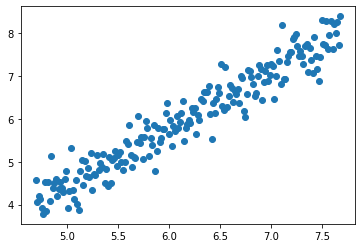

In [ ]:
plt.scatter(y_hat, y)
plt.show()

We can plot the decay of the loss over epochs, using results saved in the `history` object

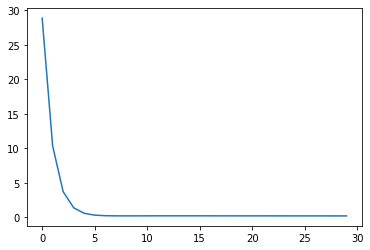

In [ ]:
plt.plot(history.history['loss'])

We can also retrieve the weights (coefficients) estimated in the final layer:

In [ ]:
model.get_weights()

[array([[2.990636]], dtype=float32), array([1.7000456], dtype=float32)]

## Exercise 2.1 [optional]

Using the `scikitlearn` dataset `diabetes`, you should fit a simple linear regression model with **Keras**:

- select one feature from the data (age, sex, bmi etc.)
- build your Keras model
- compile the model
- fit the model
- evaluate the model

We have prepared the data loading step for you:

In [2]:
import pandas as pd
import sklearn.datasets

diabetes = sklearn.datasets.load_diabetes()
#converting numpy array -> pandas DataFrame
diabetes.data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names) 
#quantitative measure of disease progression
diabetes.target = pd.Series(diabetes.target) 

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [4]:
diabetes.data ## features

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [5]:
diabetes.target ## quantitative measure of disease progression

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Length: 442, dtype: float64

Now it's your turn to play a bit with basic Keras: enjoy!

In [18]:
y = diabetes.target
x = diabetes.data[['bmi','age']]
print(y)
print(x)

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Length: 442, dtype: float64
          bmi       age
0    0.061696  0.038076
1   -0.051474 -0.001882
2    0.044451  0.085299
3   -0.011595 -0.089063
4   -0.036385  0.005383
..        ...       ...
437  0.019662  0.041708
438 -0.015906 -0.005515
439 -0.015906  0.041708
440  0.039062 -0.045472
441 -0.073030 -0.045472

[442 rows x 2 columns]


### Build the model

In [9]:
model = Sequential()
model.add(Dense(units = 1, input_dim=2, activation='linear'))

In [10]:
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


### Fit the model

In [12]:
history = model.fit(x, y, epochs=30, shuffle=False)

Epoch 1/30
14/14 [==============================] - 1s 1ms/step - loss: 24006.5312 - mse: 24006.5312
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 16191.2002 - mse: 16191.2002
Epoch 3/30
14/14 [==============================] - 0s 1ms/step - loss: 11751.5010 - mse: 11751.5010
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 9228.9688 - mse: 9228.9688
Epoch 5/30
14/14 [==============================] - 0s 1ms/step - loss: 7795.2583 - mse: 7795.2583
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 6979.9136 - mse: 6979.9136
Epoch 7/30
14/14 [==============================] - 0s 1ms/step - loss: 6515.7397 - mse: 6515.7397
Epoch 8/30
14/14 [==============================] - 0s 1ms/step - loss: 6250.9888 - mse: 6250.9888
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 6099.4819 - mse: 6099.4819
Epoch 10/30
14/14 [==============================] - 0s 1ms/step - loss: 6012.2749 - mse: 6012.2749
Epo

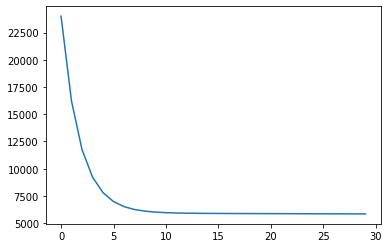

In [15]:
plt.plot(history.history['loss'])

### Evaluate the model

In [19]:
predictions = model.predict(x)
y_hat = predictions.reshape(len(y),)
print(y.shape)
print(y_hat.shape)
np.corrcoef(y,y_hat)

(442,)
(442,)


array([[1.        , 0.58160907],
       [0.58160907, 1.        ]])

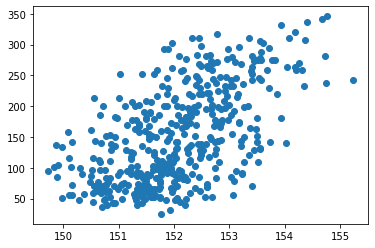

In [20]:
plt.scatter(y_hat, y)
plt.show()